In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 1. 데이터 불러오기
df = pd.read_csv(r'C:\Users\USER\Documents\ai-proj2-class4\20.data-preprocessing\전기차용_데이터셋.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df = df.sort_values('datetime')

# 2. 사용할 변수
pollutants = ['no2', 'co', 'so2', 'o3', 'pm10', 'pm25']
vehicle_types = ['diesel', 'electric', 'gasoline']

# 3. 결측치 제거
df = df.dropna(subset=pollutants + vehicle_types)

# 4. 예측용 모델 생성 함수
def predict_future(vehicle_type, future_increase=1000, steps=5):
    print(f"\n🔹 {vehicle_type.upper()} 기반 오염물질 예측 🔹")
    
    X = df[[vehicle_type]]
    
    for pol in pollutants:
        y = df[pol]

        # 모델 학습
        model = LinearRegression()
        model.fit(X, y)

        # 향후 예측 (ex: 현재보다 1,000씩 증가하는 시나리오)
        future_vals = pd.DataFrame({vehicle_type: [df[vehicle_type].max() + i * future_increase for i in range(1, steps + 1)]})
        y_future = model.predict(future_vals)

        # 결과 출력
        print(f"\n[예측: {vehicle_type} → {pol}]")
        for x, pred in zip(future_vals[vehicle_type], y_future):
            print(f"{vehicle_type}: {int(x):,} → 예상 {pol}: {pred:.2f}")

# 5. 모든 차량 유형에 대해 예측 수행
for vehicle in vehicle_types:
    predict_future(vehicle)


🔹 DIESEL 기반 오염물질 예측 🔹

[예측: diesel → no2]
diesel: 1,148,831 → 예상 no2: 0.03
diesel: 1,149,831 → 예상 no2: 0.03
diesel: 1,150,831 → 예상 no2: 0.03
diesel: 1,151,831 → 예상 no2: 0.02
diesel: 1,152,831 → 예상 no2: 0.02

[예측: diesel → co]
diesel: 1,148,831 → 예상 co: 0.47
diesel: 1,149,831 → 예상 co: 0.47
diesel: 1,150,831 → 예상 co: 0.46
diesel: 1,151,831 → 예상 co: 0.46
diesel: 1,152,831 → 예상 co: 0.46

[예측: diesel → so2]
diesel: 1,148,831 → 예상 so2: 0.00
diesel: 1,149,831 → 예상 so2: 0.00
diesel: 1,150,831 → 예상 so2: 0.00
diesel: 1,151,831 → 예상 so2: 0.00
diesel: 1,152,831 → 예상 so2: 0.00

[예측: diesel → o3]
diesel: 1,148,831 → 예상 o3: 0.02
diesel: 1,149,831 → 예상 o3: 0.02
diesel: 1,150,831 → 예상 o3: 0.02
diesel: 1,151,831 → 예상 o3: 0.02
diesel: 1,152,831 → 예상 o3: 0.02

[예측: diesel → pm10]
diesel: 1,148,831 → 예상 pm10: 33.48
diesel: 1,149,831 → 예상 pm10: 32.93
diesel: 1,150,831 → 예상 pm10: 32.39
diesel: 1,151,831 → 예상 pm10: 31.84
diesel: 1,152,831 → 예상 pm10: 31.29

[예측: diesel → pm25]
diesel: 1,148,831 → 예상 pm25: 18.

In [7]:
import matplotlib.pyplot as plt

def plot_simple_regression(vehicle_type, future_vals, predictions):
    for pol in pollutants:
        plt.figure(figsize=(8, 5))
        plt.plot(future_vals[vehicle_type], predictions[pol], marker='o', label=f'{vehicle_type} → {pol}')
        plt.title(f"[단순회귀] {vehicle_type} 차량 증가에 따른 {pol.upper()} 예측")
        plt.xlabel(f"{vehicle_type} 차량 수")
        plt.ylabel(f"{pol} 농도")
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()

In [8]:
# 예시: diesel 기반 예측 결과 시각화
predictions = {}
for pol in pollutants:
    y = df[pol]
    model = LinearRegression()
    model.fit(df[[vehicle_type]], y)
    y_future = model.predict(future_vals)
    predictions[pol] = y_future

plot_simple_regression(vehicle_type='diesel', future_vals=future_vals, predictions=predictions)

NameError: name 'vehicle_type' is not defined


🚗 DIESEL 기반 단순 선형회귀 예측 결과

▶ diesel → no2
diesel: 1,148,831 → 예상 no2: 0.03
diesel: 1,149,831 → 예상 no2: 0.03
diesel: 1,150,831 → 예상 no2: 0.03
diesel: 1,151,831 → 예상 no2: 0.02
diesel: 1,152,831 → 예상 no2: 0.02


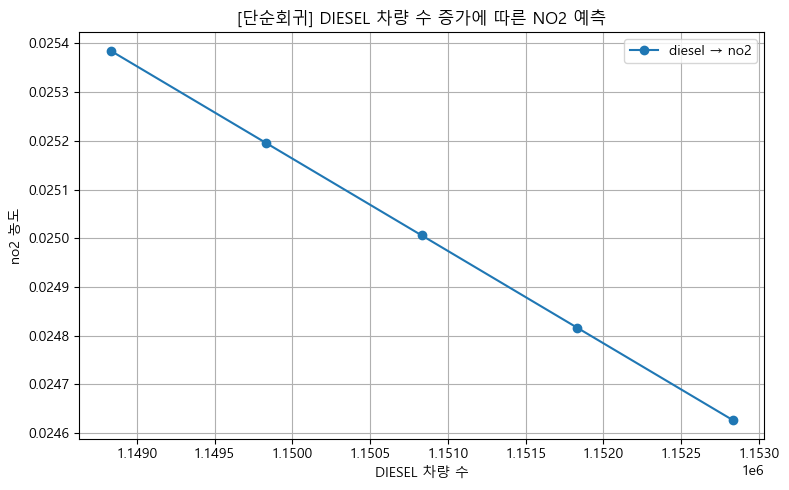


▶ diesel → co
diesel: 1,148,831 → 예상 co: 0.47
diesel: 1,149,831 → 예상 co: 0.47
diesel: 1,150,831 → 예상 co: 0.46
diesel: 1,151,831 → 예상 co: 0.46
diesel: 1,152,831 → 예상 co: 0.46


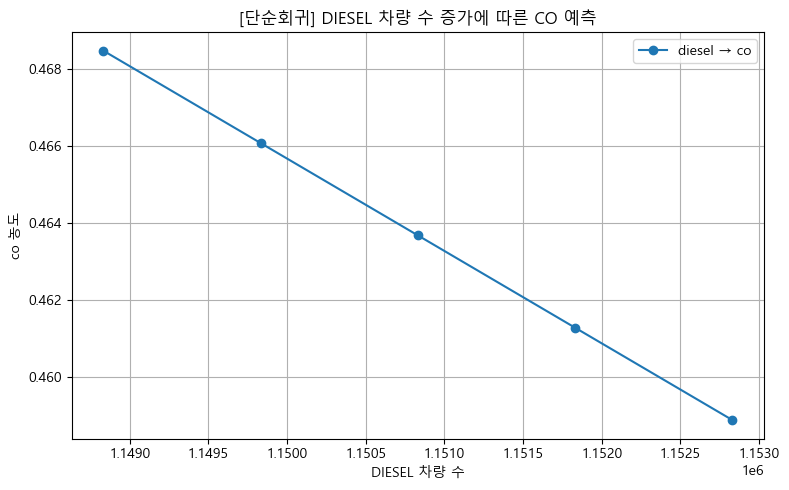


▶ diesel → so2
diesel: 1,148,831 → 예상 so2: 0.00
diesel: 1,149,831 → 예상 so2: 0.00
diesel: 1,150,831 → 예상 so2: 0.00
diesel: 1,151,831 → 예상 so2: 0.00
diesel: 1,152,831 → 예상 so2: 0.00


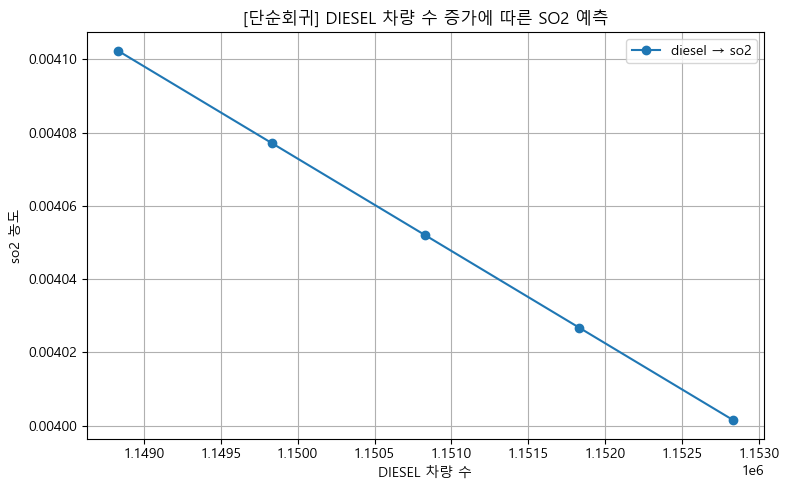


▶ diesel → o3
diesel: 1,148,831 → 예상 o3: 0.02
diesel: 1,149,831 → 예상 o3: 0.02
diesel: 1,150,831 → 예상 o3: 0.02
diesel: 1,151,831 → 예상 o3: 0.02
diesel: 1,152,831 → 예상 o3: 0.02


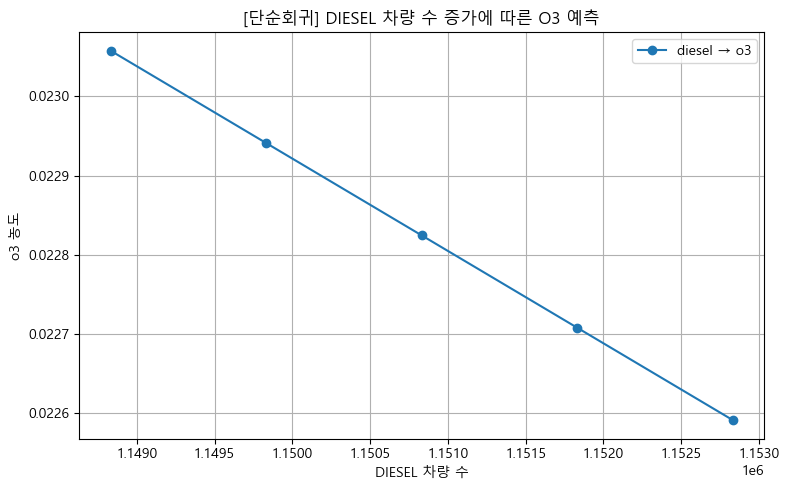


▶ diesel → pm10
diesel: 1,148,831 → 예상 pm10: 33.48
diesel: 1,149,831 → 예상 pm10: 32.93
diesel: 1,150,831 → 예상 pm10: 32.39
diesel: 1,151,831 → 예상 pm10: 31.84
diesel: 1,152,831 → 예상 pm10: 31.29


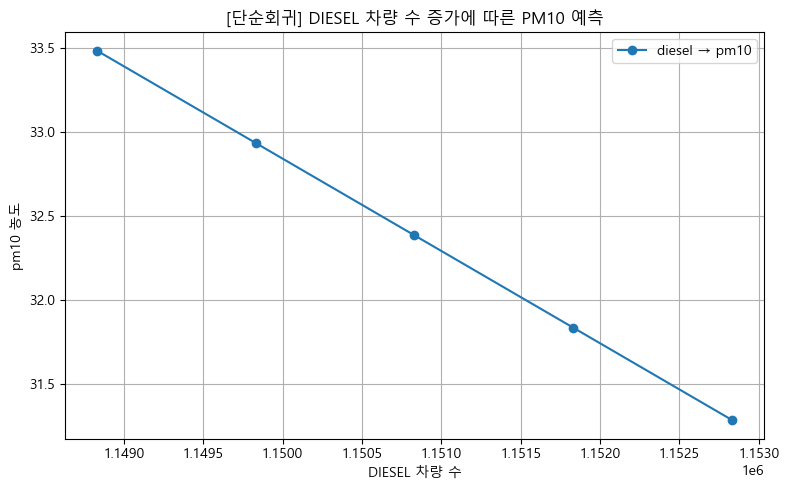


▶ diesel → pm25
diesel: 1,148,831 → 예상 pm25: 18.70
diesel: 1,149,831 → 예상 pm25: 18.39
diesel: 1,150,831 → 예상 pm25: 18.07
diesel: 1,151,831 → 예상 pm25: 17.76
diesel: 1,152,831 → 예상 pm25: 17.44


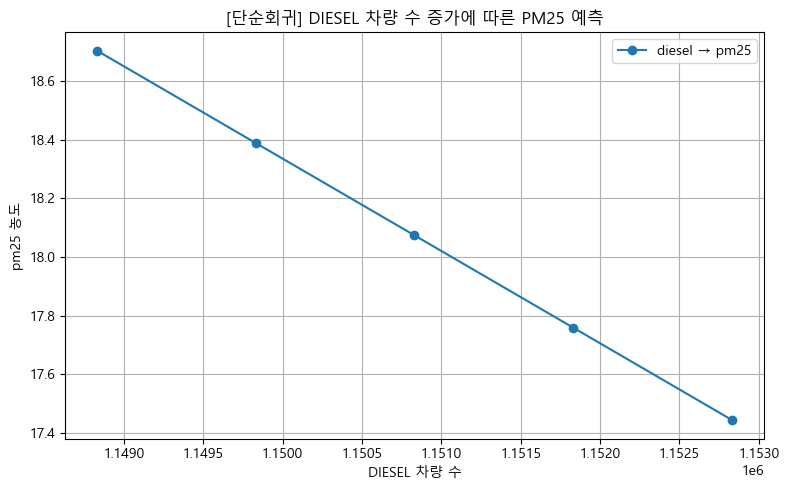


🚗 ELECTRIC 기반 단순 선형회귀 예측 결과

▶ electric → no2
electric: 10,564 → 예상 no2: 0.03
electric: 11,564 → 예상 no2: 0.03
electric: 12,564 → 예상 no2: 0.03
electric: 13,564 → 예상 no2: 0.03
electric: 14,564 → 예상 no2: 0.02


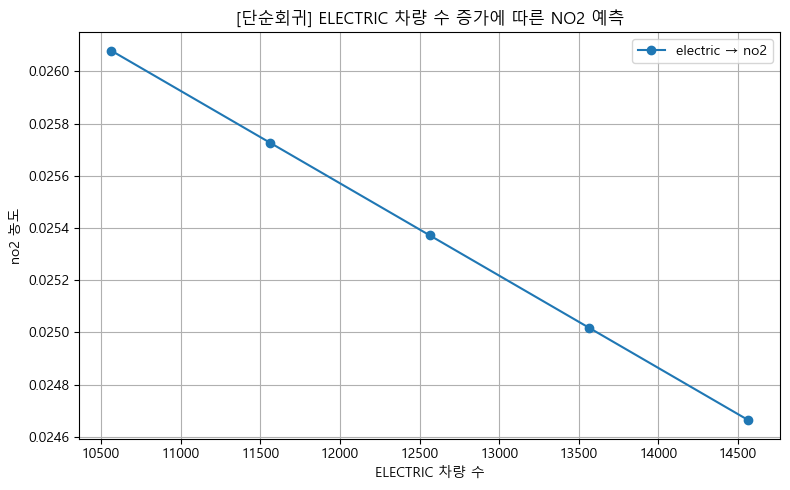


▶ electric → co
electric: 10,564 → 예상 co: 0.49
electric: 11,564 → 예상 co: 0.49
electric: 12,564 → 예상 co: 0.49
electric: 13,564 → 예상 co: 0.48
electric: 14,564 → 예상 co: 0.48


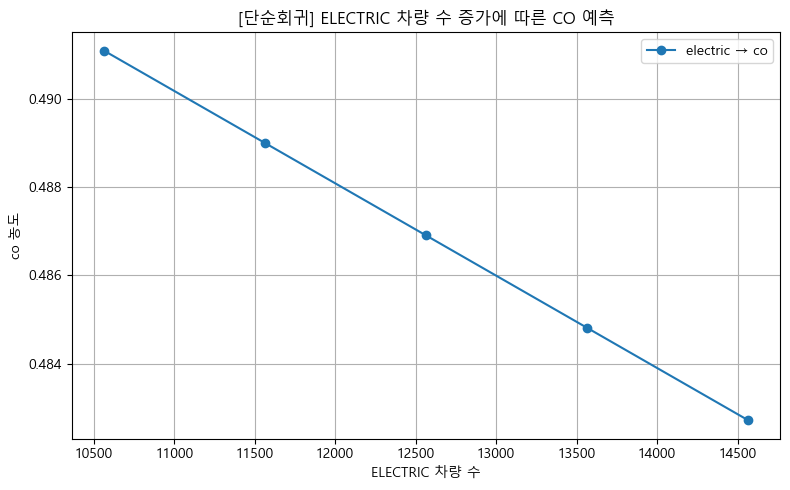


▶ electric → so2
electric: 10,564 → 예상 so2: 0.00
electric: 11,564 → 예상 so2: 0.00
electric: 12,564 → 예상 so2: 0.00
electric: 13,564 → 예상 so2: 0.00
electric: 14,564 → 예상 so2: 0.00


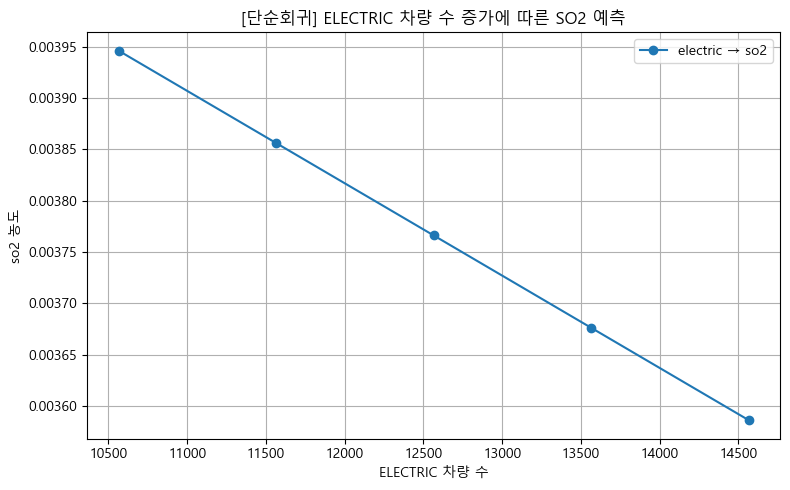


▶ electric → o3
electric: 10,564 → 예상 o3: 0.02
electric: 11,564 → 예상 o3: 0.02
electric: 12,564 → 예상 o3: 0.02
electric: 13,564 → 예상 o3: 0.01
electric: 14,564 → 예상 o3: 0.01


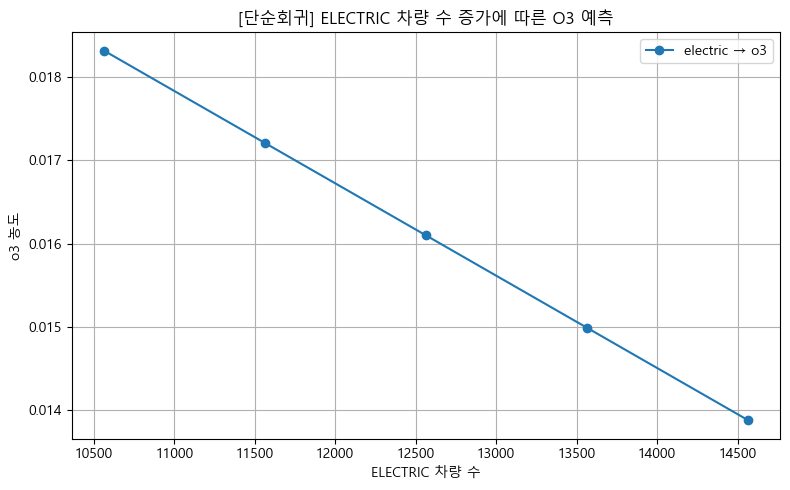


▶ electric → pm10
electric: 10,564 → 예상 pm10: 30.31
electric: 11,564 → 예상 pm10: 28.39
electric: 12,564 → 예상 pm10: 26.47
electric: 13,564 → 예상 pm10: 24.55
electric: 14,564 → 예상 pm10: 22.63


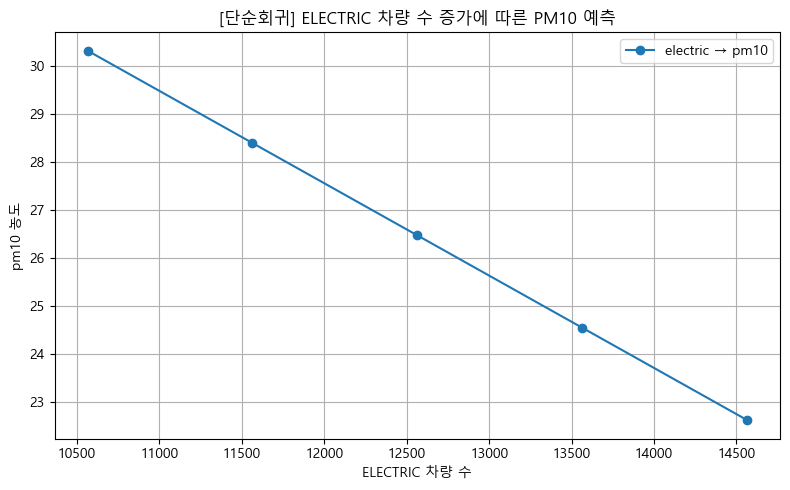


▶ electric → pm25
electric: 10,564 → 예상 pm25: 16.97
electric: 11,564 → 예상 pm25: 15.89
electric: 12,564 → 예상 pm25: 14.80
electric: 13,564 → 예상 pm25: 13.71
electric: 14,564 → 예상 pm25: 12.63


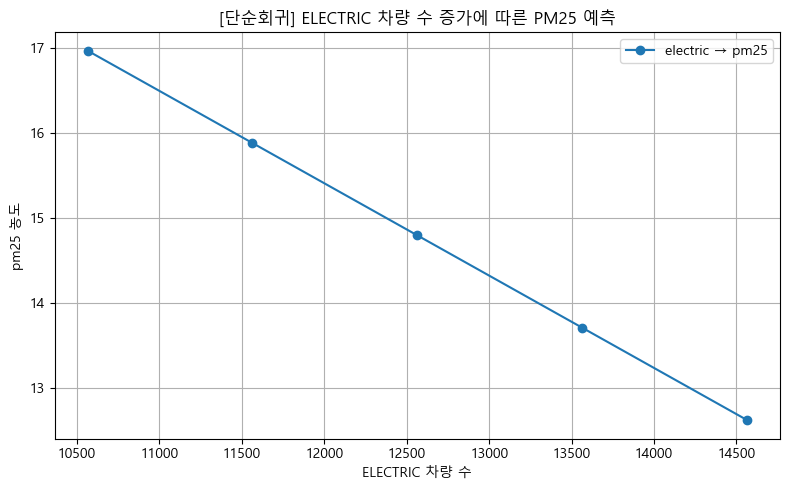


🚗 GASOLINE 기반 단순 선형회귀 예측 결과

▶ gasoline → no2
gasoline: 1,605,828 → 예상 no2: 0.03
gasoline: 1,606,828 → 예상 no2: 0.03
gasoline: 1,607,828 → 예상 no2: 0.03
gasoline: 1,608,828 → 예상 no2: 0.03
gasoline: 1,609,828 → 예상 no2: 0.03


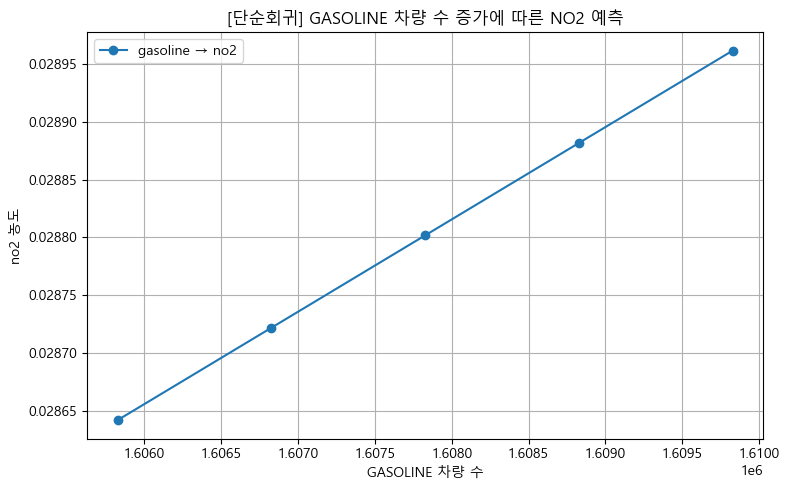


▶ gasoline → co
gasoline: 1,605,828 → 예상 co: 0.50
gasoline: 1,606,828 → 예상 co: 0.50
gasoline: 1,607,828 → 예상 co: 0.49
gasoline: 1,608,828 → 예상 co: 0.49
gasoline: 1,609,828 → 예상 co: 0.49


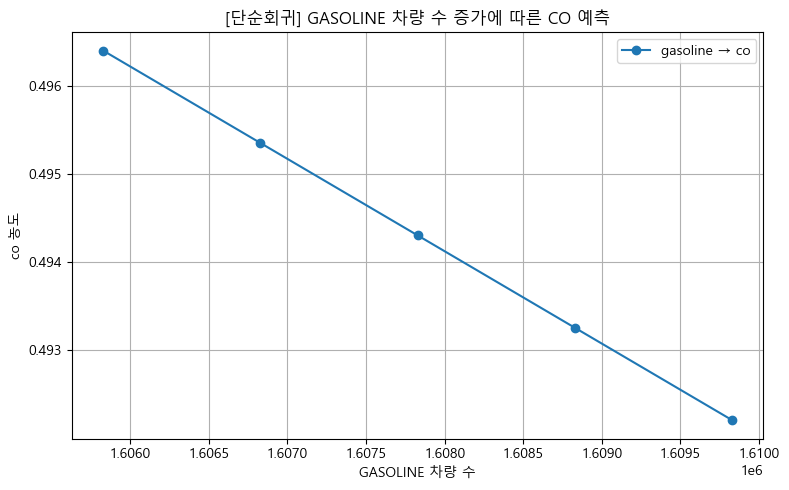


▶ gasoline → so2
gasoline: 1,605,828 → 예상 so2: 0.00
gasoline: 1,606,828 → 예상 so2: 0.00
gasoline: 1,607,828 → 예상 so2: 0.00
gasoline: 1,608,828 → 예상 so2: 0.00
gasoline: 1,609,828 → 예상 so2: 0.00


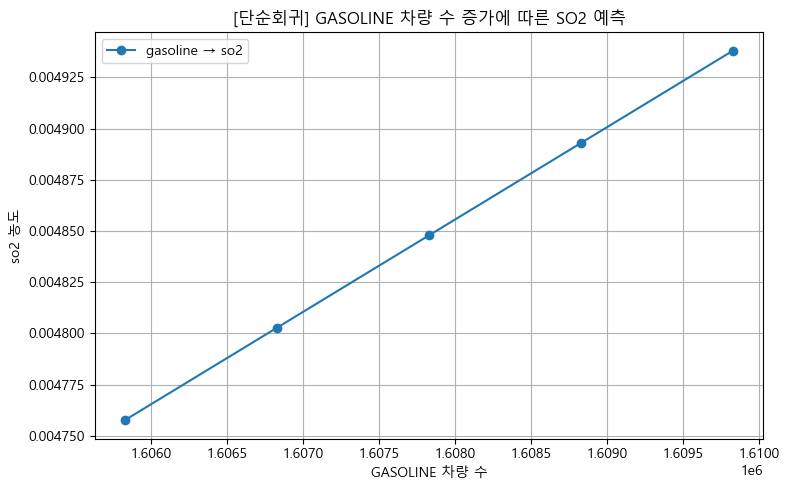


▶ gasoline → o3
gasoline: 1,605,828 → 예상 o3: 0.03
gasoline: 1,606,828 → 예상 o3: 0.03
gasoline: 1,607,828 → 예상 o3: 0.03
gasoline: 1,608,828 → 예상 o3: 0.03
gasoline: 1,609,828 → 예상 o3: 0.03


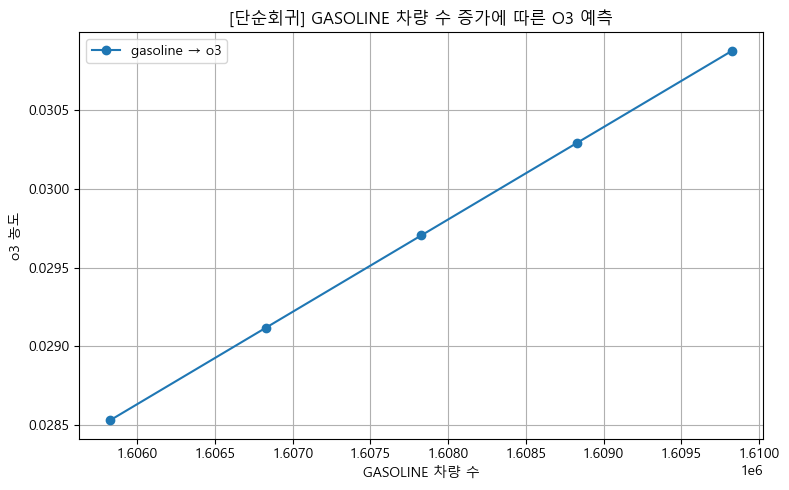


▶ gasoline → pm10
gasoline: 1,605,828 → 예상 pm10: 46.33
gasoline: 1,606,828 → 예상 pm10: 47.09
gasoline: 1,607,828 → 예상 pm10: 47.85
gasoline: 1,608,828 → 예상 pm10: 48.61
gasoline: 1,609,828 → 예상 pm10: 49.37


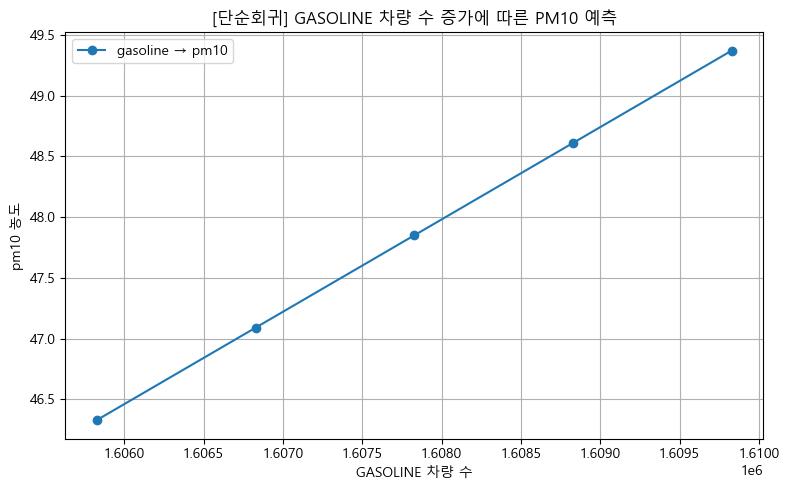


▶ gasoline → pm25
gasoline: 1,605,828 → 예상 pm25: 25.73
gasoline: 1,606,828 → 예상 pm25: 26.11
gasoline: 1,607,828 → 예상 pm25: 26.49
gasoline: 1,608,828 → 예상 pm25: 26.87
gasoline: 1,609,828 → 예상 pm25: 27.25


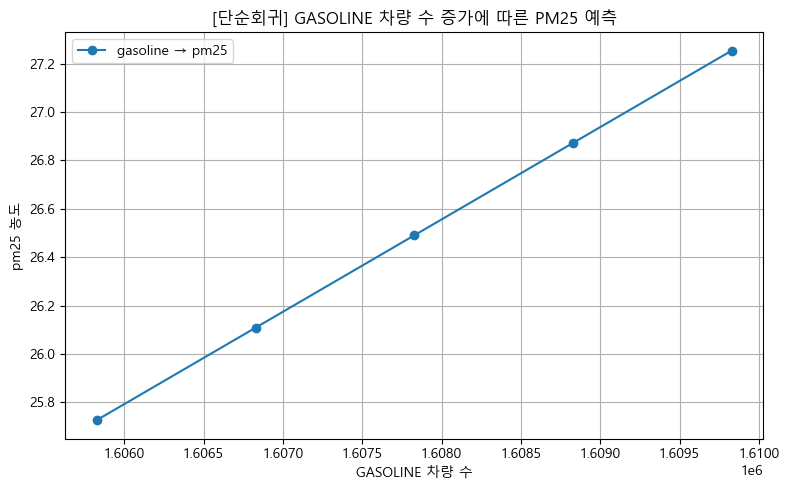

In [15]:
increase_step = 1000
steps = 5

for vehicle_type in vehicle_types:
    print(f"\n🚗 {vehicle_type.upper()} 기반 단순 선형회귀 예측 결과")

    latest_val = df[vehicle_type].max()
    future_vals = pd.DataFrame({
        vehicle_type: [latest_val + increase_step * i for i in range(1, steps + 1)]
    })

    for pol in pollutants:
        X = df[[vehicle_type]]
        y = df[pol]

        model = LinearRegression()
        model.fit(X, y)
        y_pred = model.predict(future_vals)

        # 예측값 출력
        print(f"\n▶ {vehicle_type} → {pol}")
        for x, pred in zip(future_vals[vehicle_type], y_pred):
            print(f"{vehicle_type}: {int(x):,} → 예상 {pol}: {pred:.2f}")
            
        import matplotlib as mpl

        # 폰트 설정
        mpl.rcParams['font.family'] = 'Malgun Gothic'

        # 마이너스 기호 깨짐 방지
        mpl.rcParams['axes.unicode_minus'] = False

        # 시각화
        plt.figure(figsize=(8, 5))
        plt.plot(future_vals[vehicle_type], y_pred, marker='o', label=f'{vehicle_type} → {pol}')
        plt.title(f"[단순회귀] {vehicle_type.upper()} 차량 수 증가에 따른 {pol.upper()} 예측")
        plt.xlabel(f"{vehicle_type.upper()} 차량 수")
        plt.ylabel(f"{pol} 농도")
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()

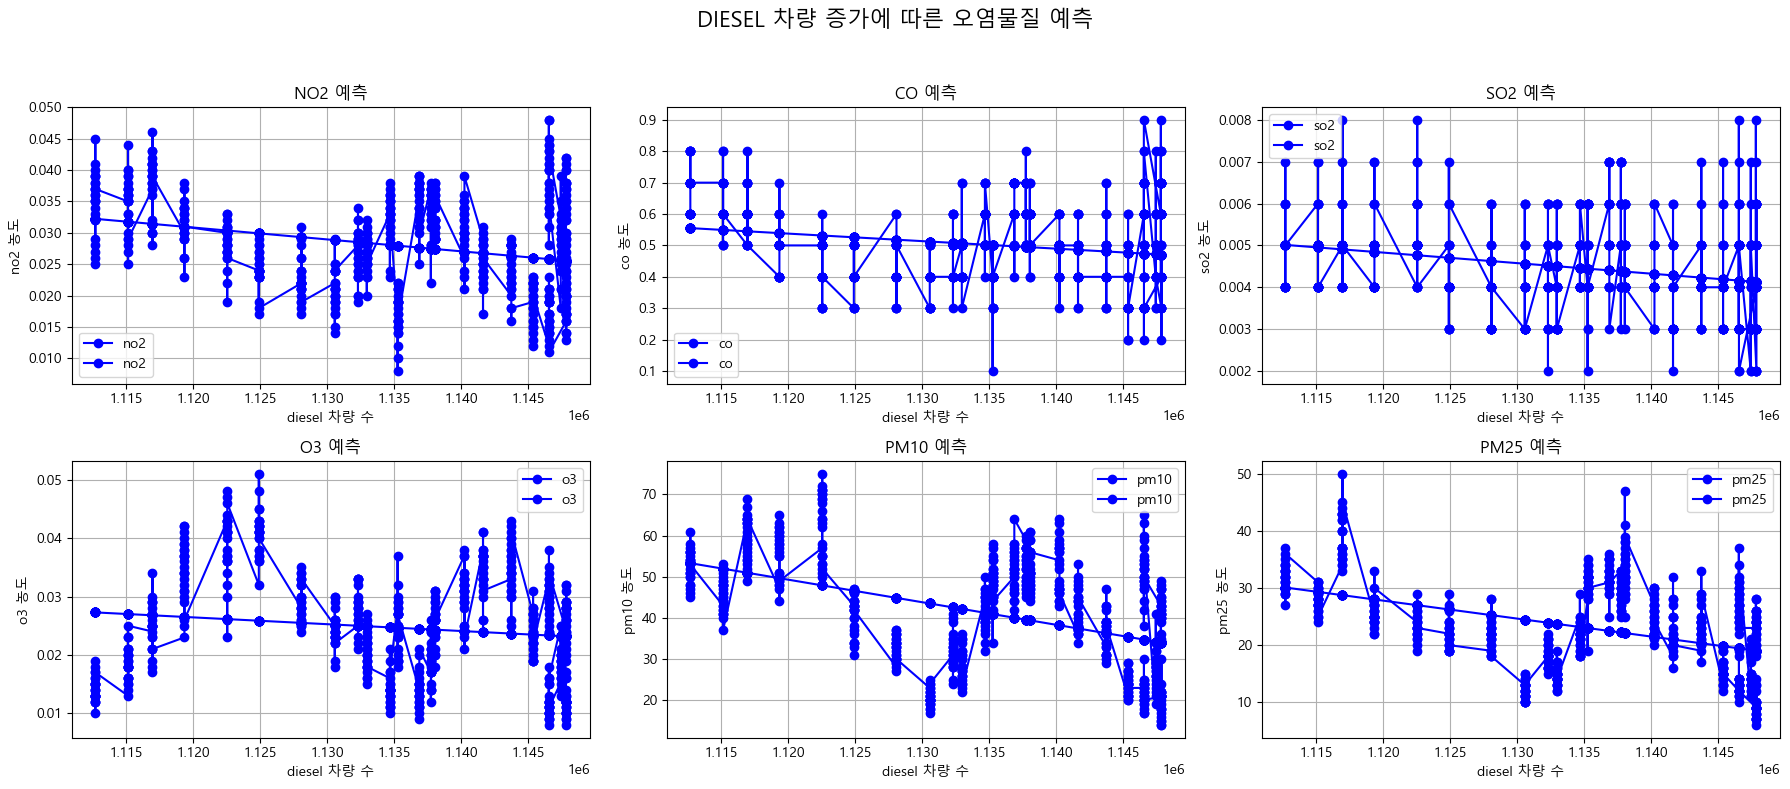

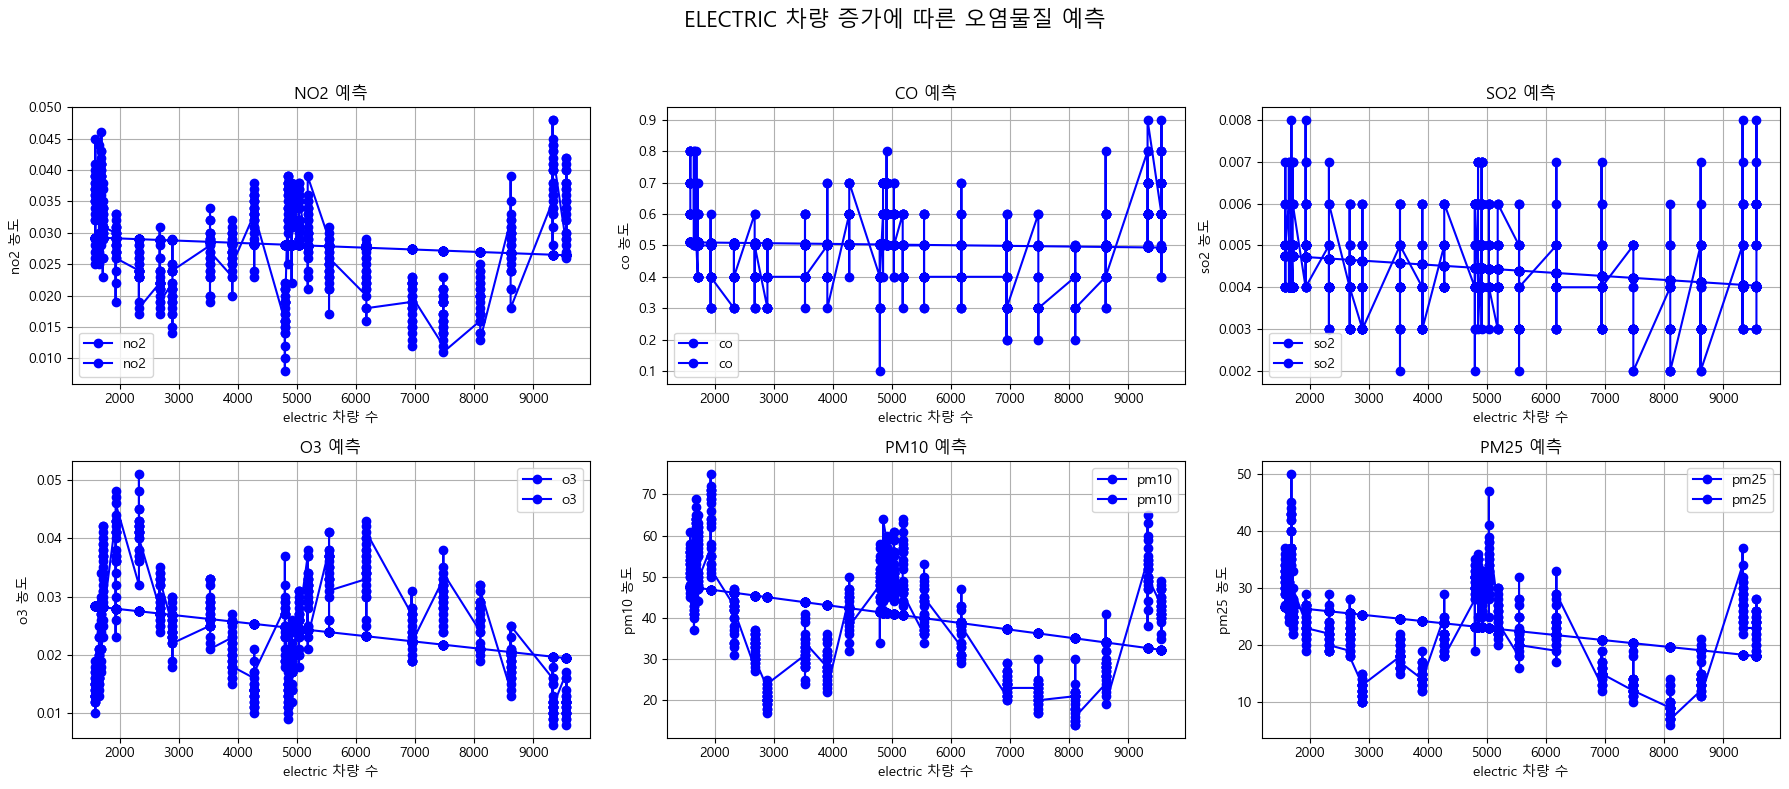

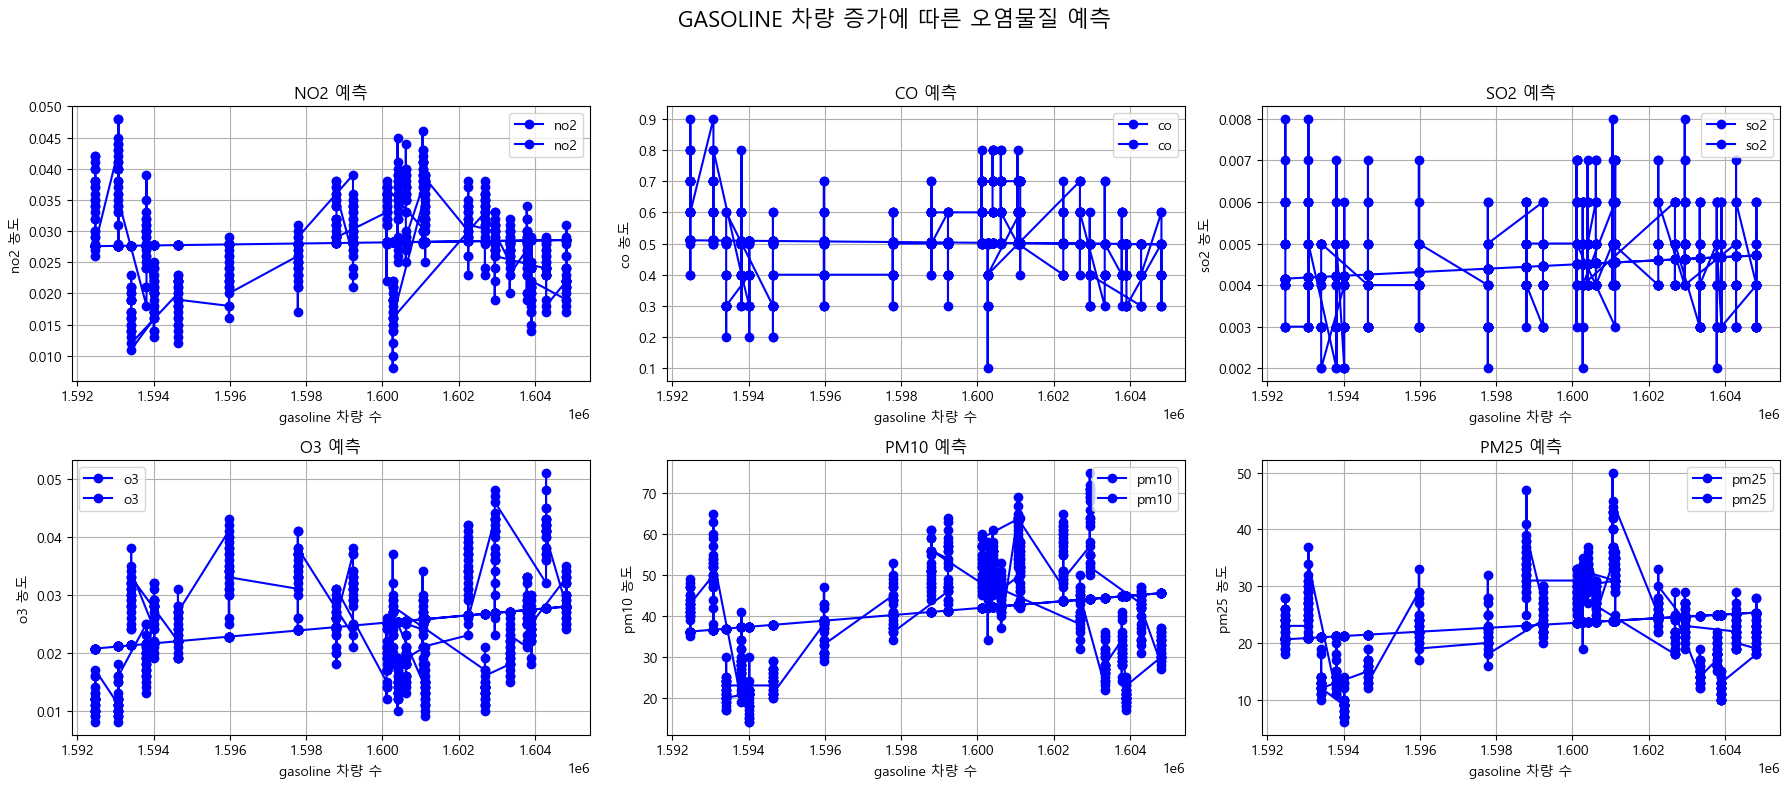

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 1. 데이터 불러오기
df = pd.read_csv(r'C:\Users\USER\Documents\ai-proj2-class4\20.data-preprocessing\전기차용_데이터셋.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df = df.sort_values('datetime')

# 2. 변수 정의
vehicle_types = ['diesel', 'electric', 'gasoline']
pollutants = ['no2', 'co', 'so2', 'o3', 'pm10', 'pm25']

# 3. 결측치 제거
df = df.dropna(subset=vehicle_types + pollutants)

# 4. 시각화 설정
increase_step = 1000
steps = 10

for vehicle_type in vehicle_types:
    latest_val = df[vehicle_type].max()
    future_vals = [latest_val + increase_step * i for i in range(1, steps + 1)]
    future_df = pd.DataFrame({vehicle_type: future_vals})

    fig, axs = plt.subplots(2, 3, figsize=(18, 8))
    fig.suptitle(f"{vehicle_type.upper()} 차량 증가에 따른 오염물질 예측", fontsize=16)

    for i, pol in enumerate(pollutants):
        X = df[[vehicle_type]]
        y = df[pol]

        model = LinearRegression()
        model.fit(X, y)

        y_preds = model.predict(X)

        # subplot 위치 설정
        row, col = divmod(i, 3)
        ax = axs[row][col]

        # 그래프 그리기
        ax.plot(X, y, marker='o', color='blue', label=f'{pol}')
        ax.plot(X, y_preds, marker='o', color='blue', label=f'{pol}')
        ax.set_title(f'{pol.upper()} 예측')
        ax.set_xlabel(f'{vehicle_type} 차량 수')
        ax.set_ylabel(f'{pol} 농도')
        ax.grid(True)
        ax.legend()

    plt.tight_layout(rect=[0, 0, 1, 0.95])  # 타이틀 공간 확보
    plt.show()

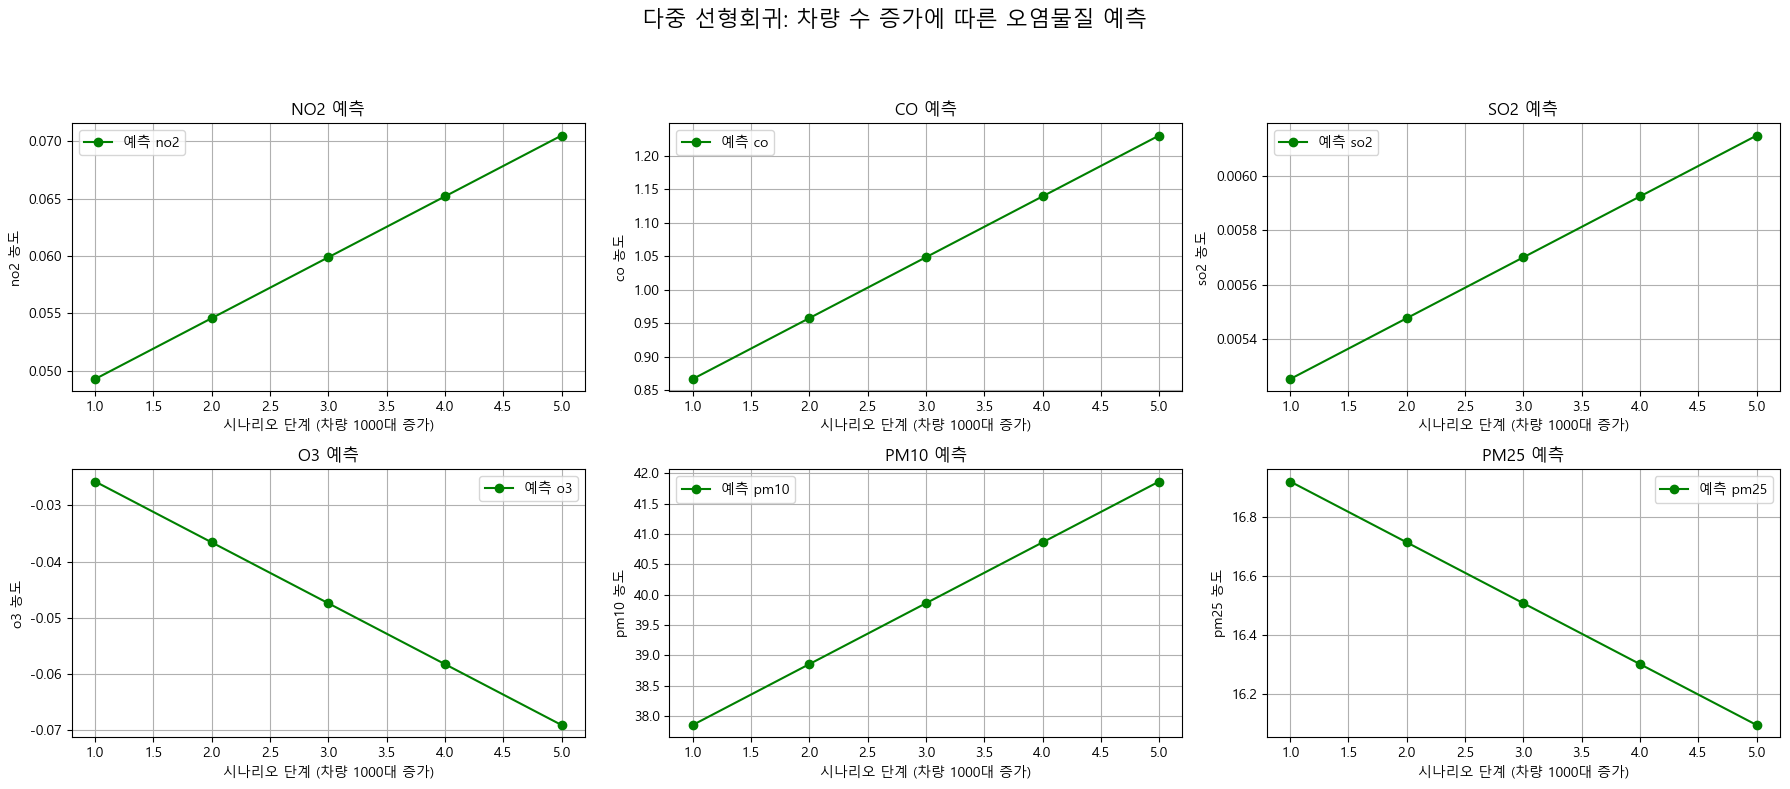

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 1. 데이터 불러오기
df = pd.read_csv(r'C:\Users\USER\Documents\ai-proj2-class4\20.data-preprocessing\전기차용_데이터셋.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df = df.sort_values('datetime')

# 2. 변수 정의
vehicle_features = ['diesel', 'electric', 'gasoline']
pollutants = ['no2', 'co', 'so2', 'o3', 'pm10', 'pm25']

# 3. 결측치 제거
df = df.dropna(subset=vehicle_features + pollutants)

# 4. 향후 시나리오 생성 (각 차량 1000대씩 증가, 총 5단계)
increase_step = 1000
steps = 5
latest_vals = df[vehicle_features].max()

future_data = pd.DataFrame({
    'diesel':   [latest_vals['diesel']   + increase_step * i for i in range(1, steps + 1)],
    'electric': [latest_vals['electric'] + increase_step * i for i in range(1, steps + 1)],
    'gasoline': [latest_vals['gasoline'] + increase_step * i for i in range(1, steps + 1)],
})

# 5. 시각화: 2행 3열 subplot
fig, axs = plt.subplots(2, 3, figsize=(18, 8))
fig.suptitle("다중 선형회귀: 차량 수 증가에 따른 오염물질 예측", fontsize=16)

for i, pol in enumerate(pollutants):
    X = df[vehicle_features]
    y = df[pol]

    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(future_data)

    # subplot 위치
    row, col = divmod(i, 3)
    ax = axs[row][col]

    # 예측 그래프
    ax.plot(range(1, steps + 1), y_pred, marker='o', color='green', label=f'예측 {pol}')
    ax.set_title(f'{pol.upper()} 예측')
    ax.set_xlabel('시나리오 단계 (차량 1000대 증가)')
    ax.set_ylabel(f'{pol} 농도')
    ax.grid(True)
    ax.legend()

plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()

In [20]:
vehicle_columns = ['diesel', 'electric', 'gasoline']
vehicle_stats = df[vehicle_columns].describe()

# 2. 출력
print("🚘 차량 등록 수 통계 요약:")
print(vehicle_stats)

🚘 차량 등록 수 통계 요약:
             diesel     electric      gasoline
count  6.000000e+02   600.000000  6.000000e+02
mean   1.134370e+06  4780.500000  1.599368e+06
std    1.083268e+04  2483.041463  3.934644e+03
min    1.112698e+06  1589.000000  1.592471e+06
25%    1.127276e+06  2590.250000  1.595640e+06
50%    1.136049e+06  4824.000000  1.600334e+06
75%    1.144124e+06  6368.250000  1.602754e+06
max    1.147831e+06  9564.000000  1.604828e+06


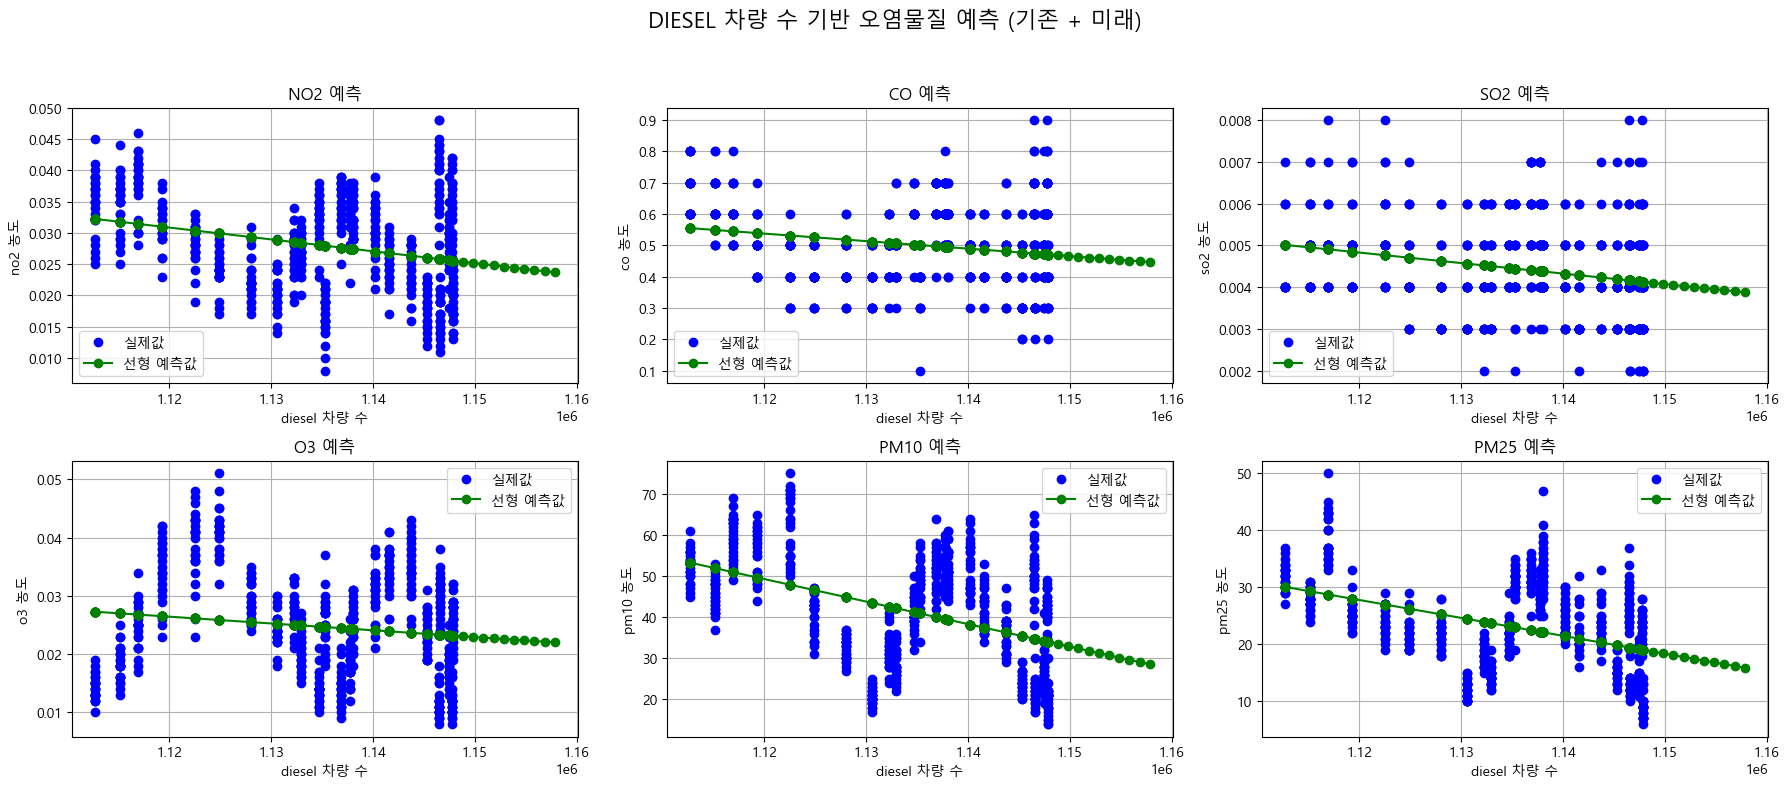

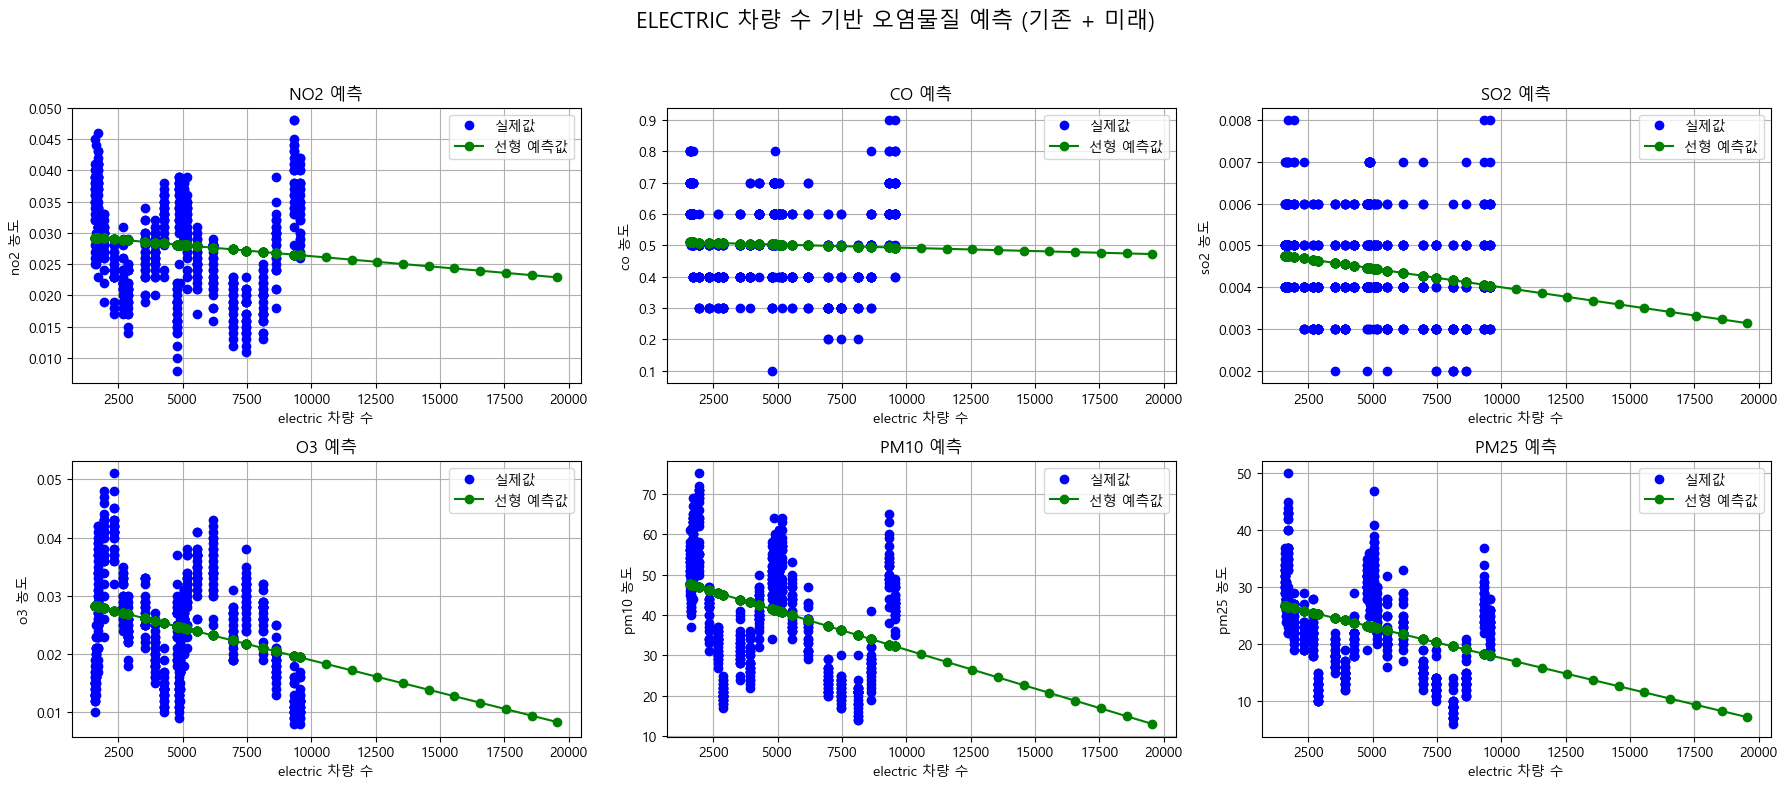

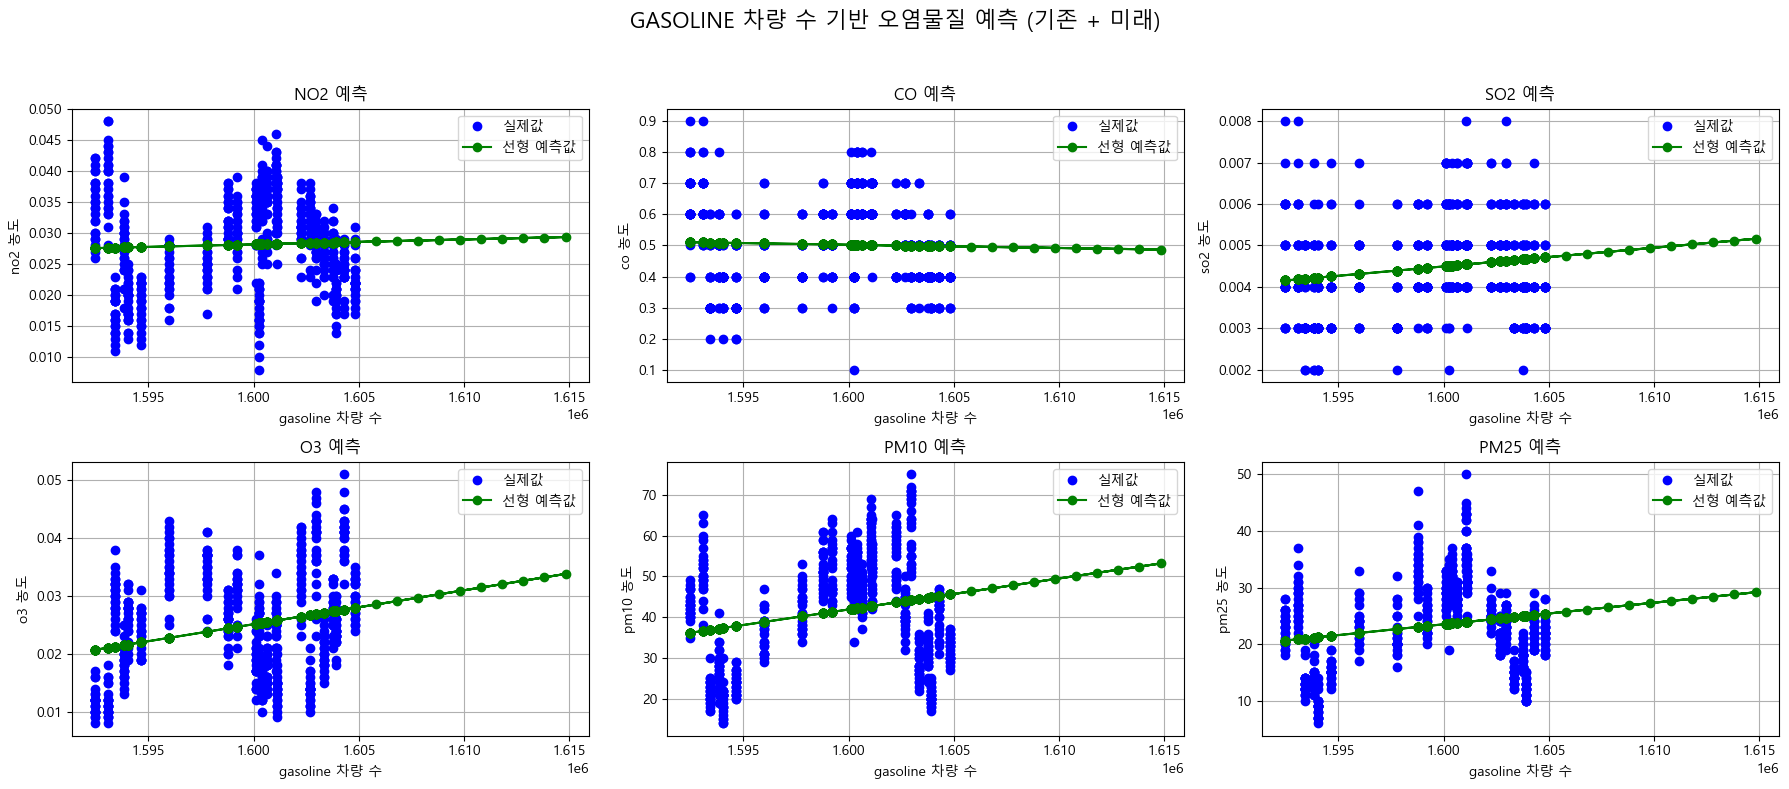

: 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# 1. 데이터 불러오기
df = pd.read_csv(r'C:\Users\USER\Documents\ai-proj2-class4\20.data-preprocessing\전기차용_데이터셋.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df = df.sort_values('datetime')

# 2. 변수 정의
vehicle_types = ['diesel', 'electric', 'gasoline']
pollutants = ['no2', 'co', 'so2', 'o3', 'pm10', 'pm25']

# 3. 결측치 제거
df = df.dropna(subset=vehicle_types + pollutants)

# 4. 시각화 설정
increase_step = 1000
steps = 10

for vehicle_type in vehicle_types:
    latest_val = df[vehicle_type].max()
    future_vals = [latest_val + increase_step * i for i in range(1, steps + 1)]
    future_df = pd.DataFrame({vehicle_type: future_vals})

    fig, axs = plt.subplots(2, 3, figsize=(18, 8))
    fig.suptitle(f"{vehicle_type.upper()} 차량 수 기반 오염물질 예측 (기존 + 미래)", fontsize=16)

    for i, pol in enumerate(pollutants):
        X = df[[vehicle_type]]
        y = df[pol]

        # 모델 학습
        model = LinearRegression()
        model.fit(X, y)

        # 기존 데이터 예측
        y_pred_existing = model.predict(X)

        # 미래 예측
        y_pred_future = model.predict(future_df)

        # x축 연결용: 기존 + 미래 차량 수
        all_x = pd.concat([X, future_df])
        all_y = np.concatenate([y_pred_existing, y_pred_future])

        # subplot 위치 설정
        row, col = divmod(i, 3)
        ax = axs[row][col]

        # 실제 값 (파랑 점선)
        ax.plot(X, y, 'o', label='실제값', color='blue')

        # 예측값 (기존 + 미래, 초록 실선)
        ax.plot(all_x, all_y, '-o', label='선형 예측값', color='green')

        # 수치 설정
        ax.set_title(f'{pol.upper()} 예측')
        ax.set_xlabel(f'{vehicle_type} 차량 수')
        ax.set_ylabel(f'{pol} 농도')
        ax.grid(True)
        ax.legend()

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()